<a href="https://colab.research.google.com/github/nicolerdz/Regresion-no-lineal-y-logistica/blob/main/2020_8_Regresion_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#Cargar archivo csv desde seaborn
df2020=pd.read_csv('Gastos_y_costos_2020_sin_nulos.csv', index_col= 0)
df2020

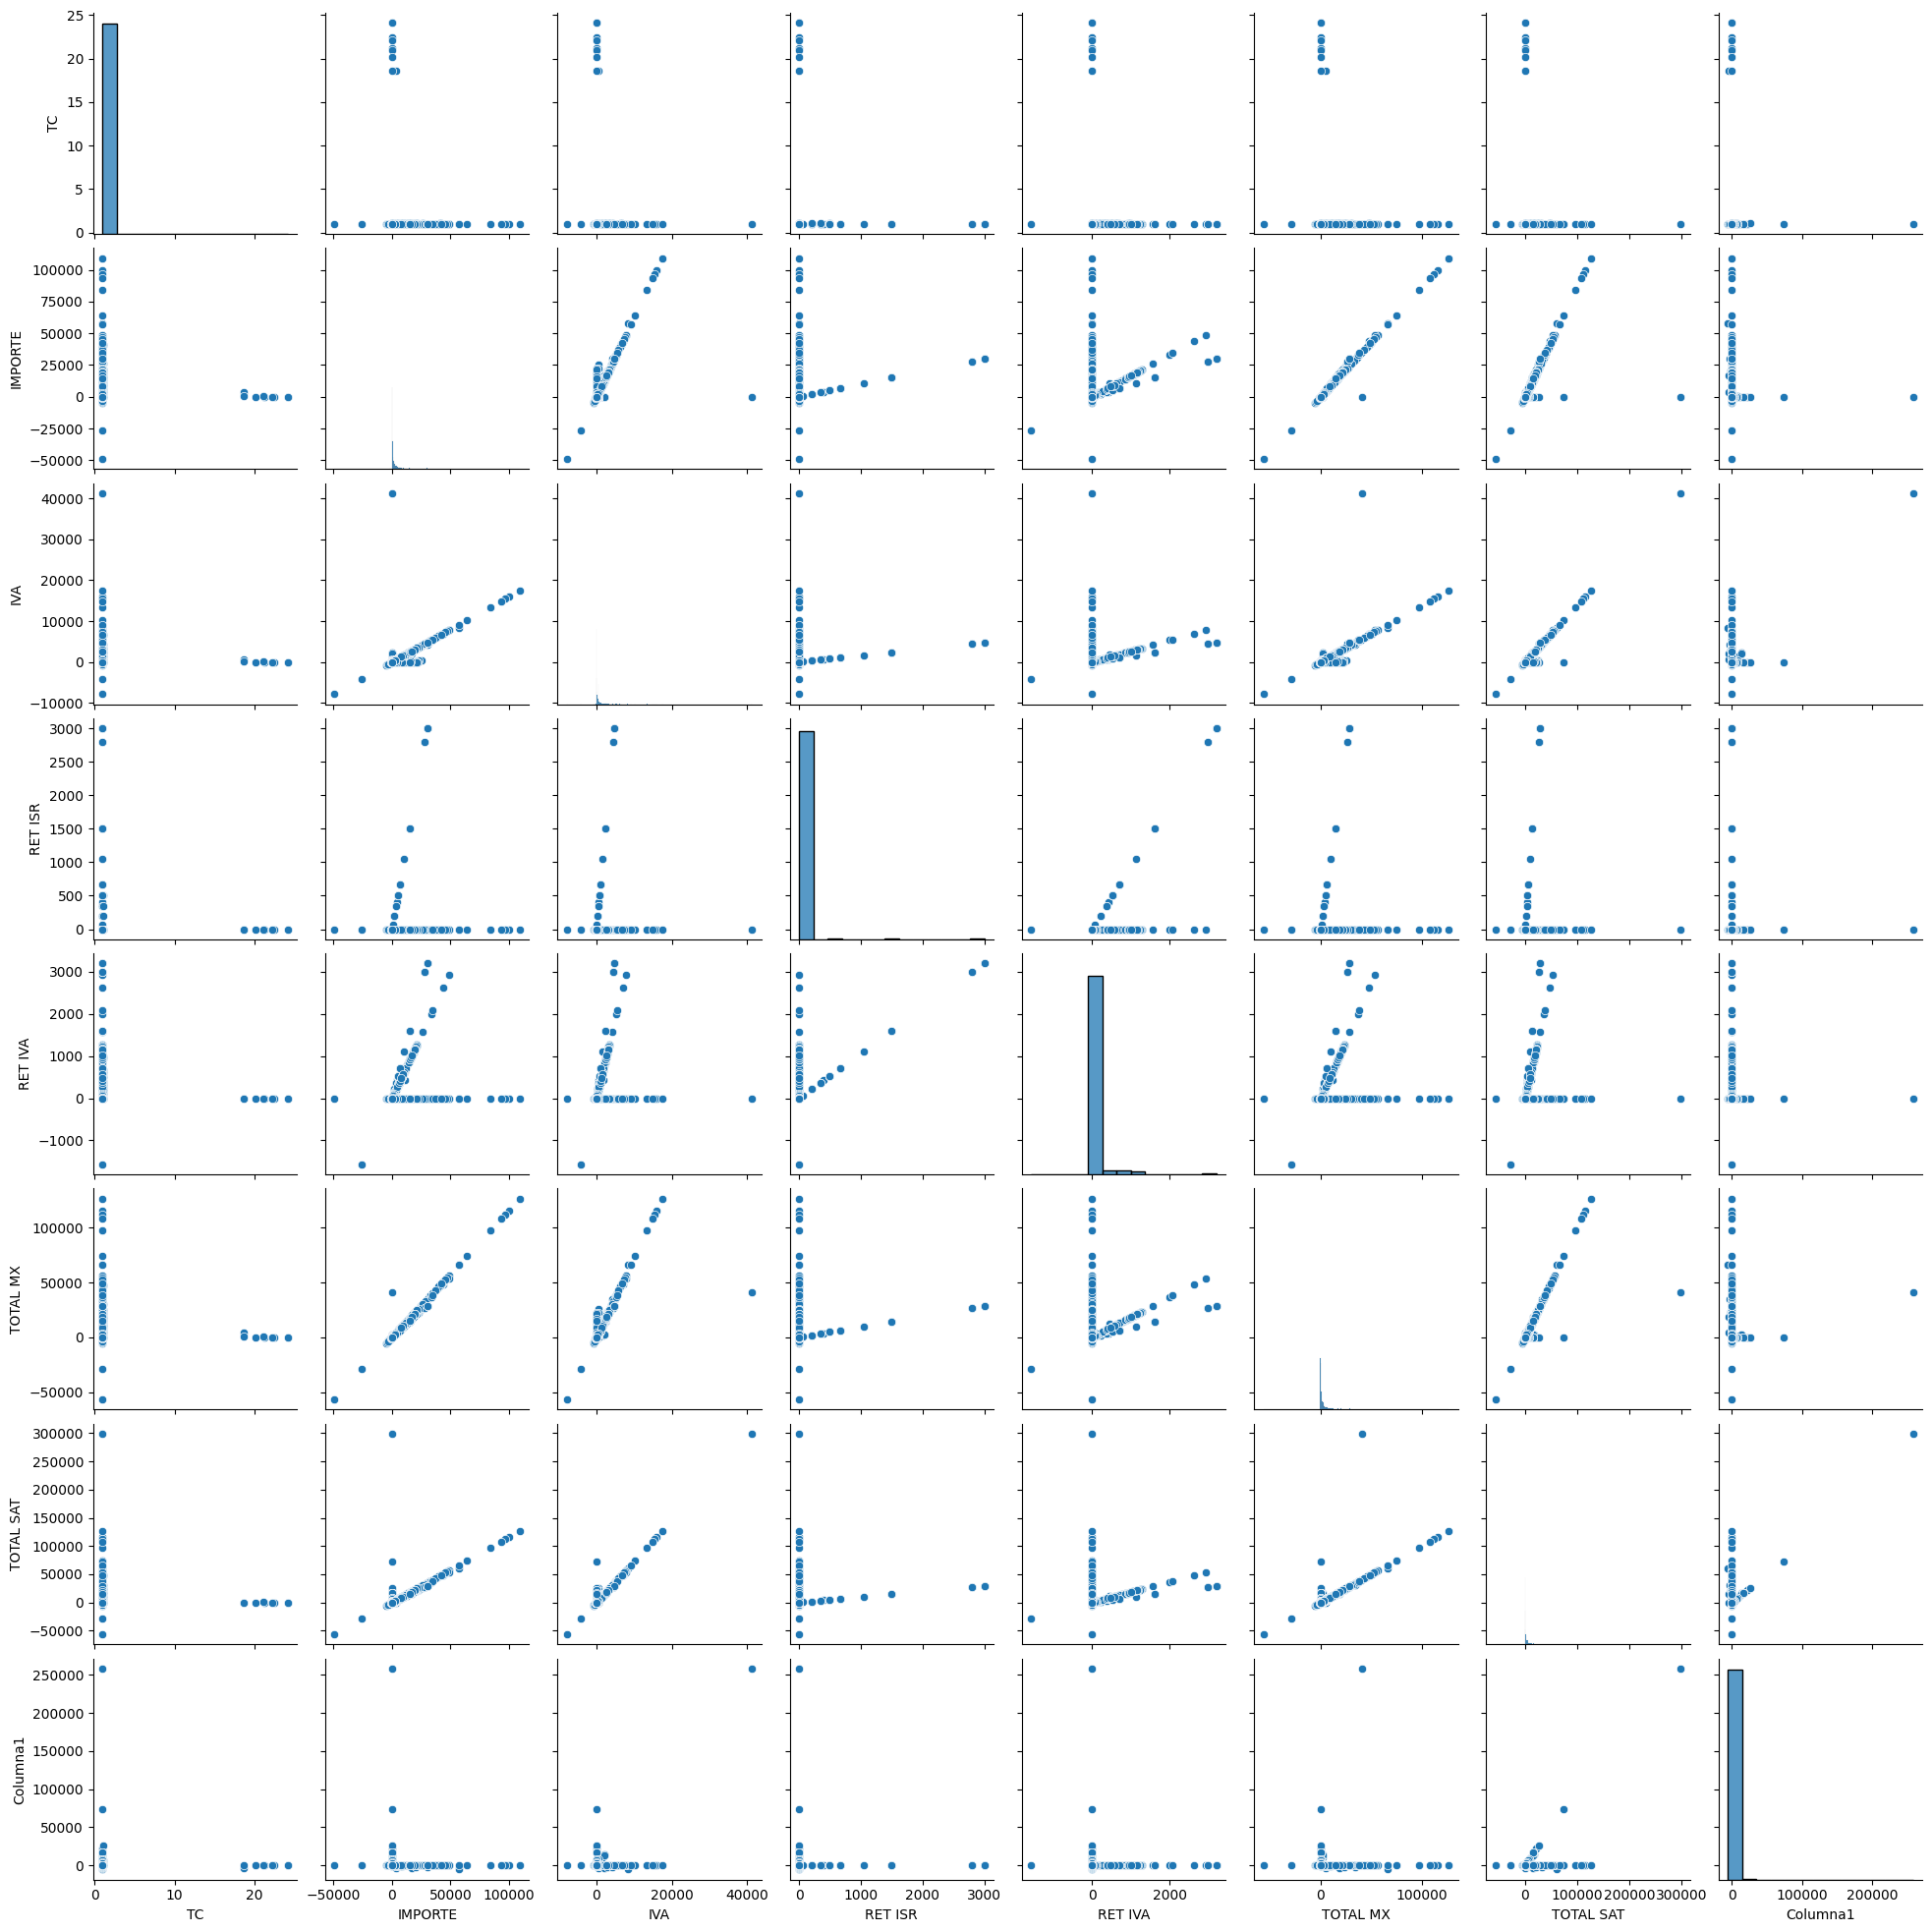

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df2020)

In [ ]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        3342 non-null   object 
 1   FOLIO        3342 non-null   object 
 2   UUID         3342 non-null   object 
 3   RFC          3342 non-null   object 
 4   PROVEEDOR    3342 non-null   object 
 5   TIPO GASTO   3342 non-null   object 
 6   GASTO        3342 non-null   object 
 7   DESCRIPCION  3342 non-null   object 
 8   TC           3342 non-null   float64
 9   IMPORTE      3342 non-null   float64
 10  IVA          3342 non-null   float64
 11  RET ISR      3342 non-null   float64
 12  RET IVA      3342 non-null   float64
 13  TOTAL MX     3342 non-null   float64
 14  TOTAL SAT    3342 non-null   float64
 15  TIPO         3342 non-null   object 
 16  STATUS       3342 non-null   object 
 17  POLIZA       3342 non-null   object 
 18  Columna1     3342 non-null   float64
dtypes: flo

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df2020[['IVA']]
Var_Dep= df2020['TOTAL MX']

In [ ]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

# **MODELO LINEAL**

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['IVA'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.35200964]),
 'rank_': 1,
 'singular_': array([77903.60384296]),
 'intercept_': 734.0770713095808}

**Modelo matemático: y= 5.35200964x + 734.0770713095808**

---




In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.7509554914034156

In [ ]:
coef_Deter2020=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter2020

0.7509554914034156

In [ ]:
coef_Correl2020=np.sqrt(coef_Deter2020)
coef_Correl2020

0.8665768814152703

# **MODELO NO LINEAL**

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c

            y = ax^3 + bx + c

            y = ax^3 + bx^2 + c

            y = a*exp(bx) + c

## **MODELO 1 CUADRATICO**

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df2020['IVA'], df2020['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-1.58138904e-04,  8.02375985e+00, -3.24852529e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df2020['IVA'], df2020['TOTAL MX'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,IVA
0,16915.451598
1,303.238233
2,-74.665160
3,12941.444224
4,3803.169969
...,...
3337,-162.756933
3338,2587.259452
3339,-114.658419
3340,-324.852529


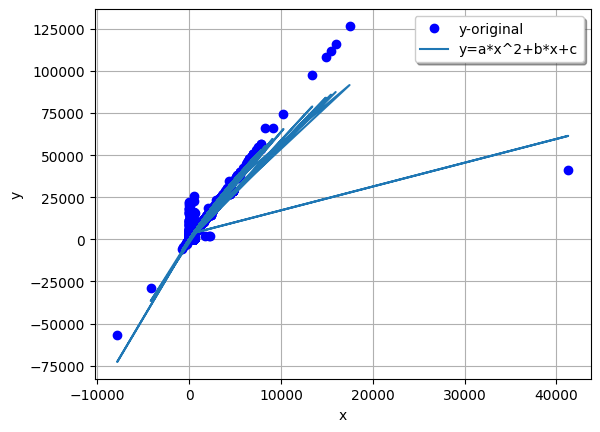

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2Cuad = r2_score(y, yfit1) 
R2Cuad

0.9194323864177707

## **MODELO 2 CUBICO**

In [ ]:
def func2(x, a, b, c):
    return a*x**3 + b*x**2 + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df2020['IVA'], df2020['TOTAL MX'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-2.17409135e-08,  9.17443191e-04,  2.29282106e+03])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df2020['IVA'], df2020['TOTAL MX'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*x**3+b2*x**2+c2

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

,IVA
0,6683.203814
1,2298.449701
2,2293.713473
3,4869.991170
4,2537.653485
...,...
3337,2293.195603
3338,2414.367314
3339,2293.450917
3340,2292.821058


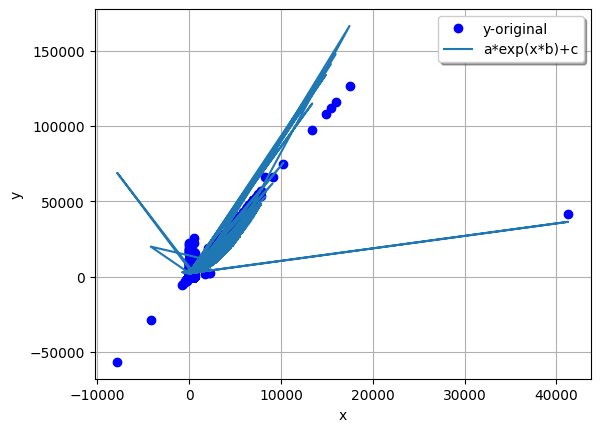

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2Cub = r2_score(y, yfit2) 
R2Cub

0.6868140831585391

In [ ]:
linealDeter = []
linealDeter.append(coef_Deter2020)

In [ ]:
cubDeter = []
cubDeter.append(R2Cub)

In [ ]:
cuadrDeter = []
cuadrDeter.append(R2Cuad)

In [ ]:
tabla = pd.DataFrame()
anios = ['2020']
tabla['Años']=anios
tabla['Función lineal']=linealDeter
tabla['Función cuadrática']=cuadrDeter
tabla['Función cúbica']=cubDeter
tabla = tabla.set_index('Años')

print('COEFICIENTES DE DETERMINACIÓN')
print(tabla)

COEFICIENTES DE DETERMINACIÓN
      Función lineal  Función cuadrática  Función cúbica
Años                                                    
2020        0.750955            0.919432        0.686814
